## Importing all the necessary modules

In [133]:
#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np 
import pandas as pd
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split

#Module related to calculation of metrics
from sklearn import metrics

## Importing the data from an external source into the Python environment

In [135]:
data = pd.read_csv('Churn_Modelling.csv')
data.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [136]:
data.shape

(10000, 14)

In [137]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

**According to the Naming Conversion the variables are following the rules.**

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [139]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## Checking for Data Duplicates

In [140]:
data.duplicated().value_counts

<bound method IndexOpsMixin.value_counts of 0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68  

In [141]:
data.duplicated().sum()

0

**There is no duplicate values in the data.**

## Missing Values Treatment

In [142]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**There is no missing values in the data**

## checking the value count and nunique of categorical variable

In [143]:
data.Surname.value_counts()

Surname
Smith                      32
Scott                      29
Martin                     29
Walker                     28
Brown                      26
Yeh                        25
Shih                       25
Genovese                   25
Maclean                    24
Wright                     24
Wilson                     23
White                      23
Ma                         23
Fanucci                    23
Wang                       22
Johnson                    22
Moore                      22
Chu                        22
Lu                         22
Thompson                   21
Mai                        21
McGregor                   21
Sun                        21
Kao                        20
Fang                       20
Watson                     20
Kennedy                    20
Hughes                     20
Jamieson                   20
Young                      20
Lo                         20
Graham                     20
Trevisani                  20
Mi

In [144]:
data.Surname.nunique()

2932

In [145]:
data.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [146]:
data.Geography.nunique()

3

In [147]:
data.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [148]:
data.Gender.nunique()

2

In [149]:
data.HasCrCard.value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [150]:
data.HasCrCard.nunique()

2

In [151]:
data.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [152]:
data.Exited.nunique()

2

In [153]:
data.IsActiveMember.value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [154]:
data.IsActiveMember.nunique() 

2

### comparison of Geography

<Axes: xlabel='Geography'>

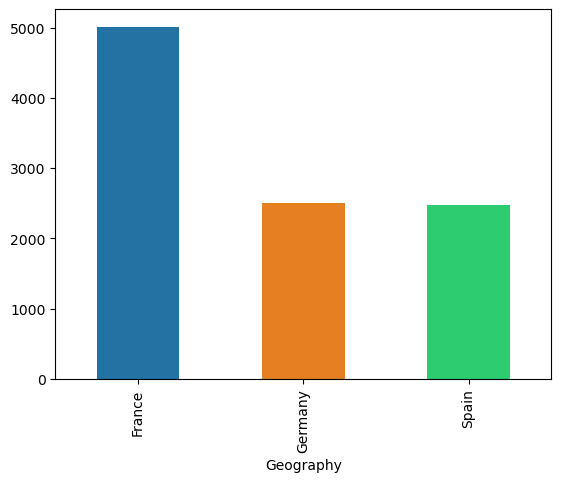

In [155]:
data['Geography'].value_counts().plot(kind='bar',color=['#2471A3','#E67E22','#2ECC71'])

### Distribution of Customer Gender

<Axes: xlabel='Gender'>

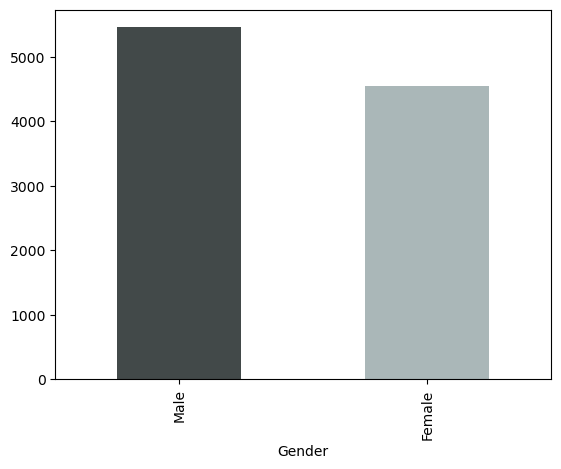

In [156]:
data['Gender'].value_counts().plot(kind='bar',color=['#424949','#AAB7B8'])

### comparison between Geography and Gender

<Axes: xlabel='Gender'>

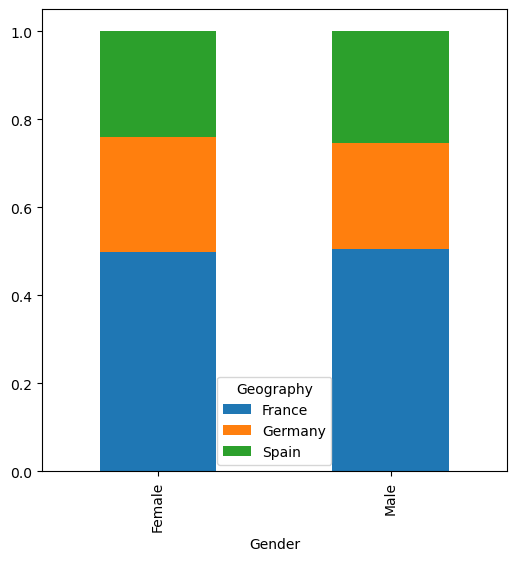

In [157]:
Gender = pd.crosstab(data['Gender'],data['Geography'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6))

### Distribution of customers by Credict card

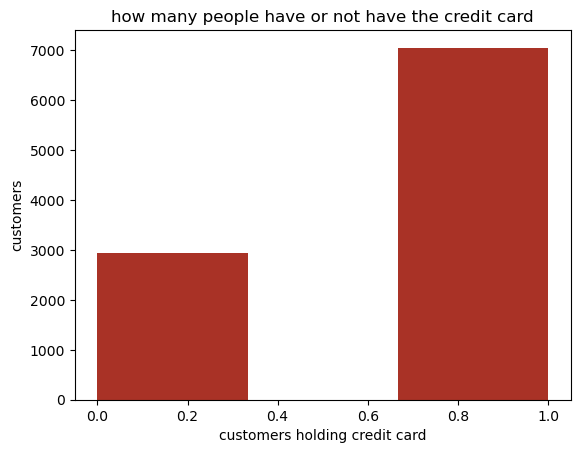

In [158]:
plt.hist(x = data.HasCrCard, bins = 3   , color = '#A93226')
plt.title('how many people have or not have the credit card')
plt.xlabel('customers holding credit card')
plt.ylabel('customers')
plt.show()

### Distribution of Active members

<Axes: xlabel='IsActiveMember'>

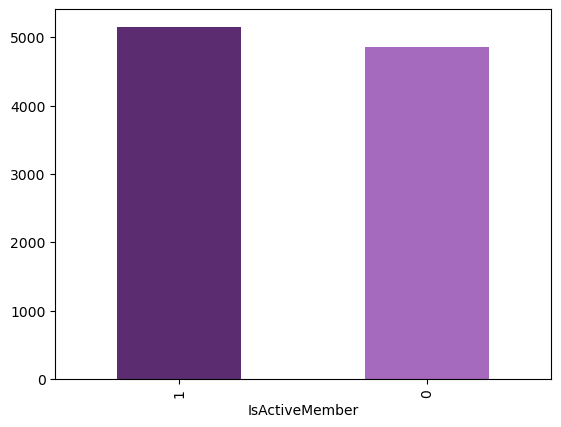

In [159]:
data['IsActiveMember'].value_counts().plot(kind='bar',color=['#5B2C6F','#A569BD'])

### Distribution of customer exit

<Axes: xlabel='Exited'>

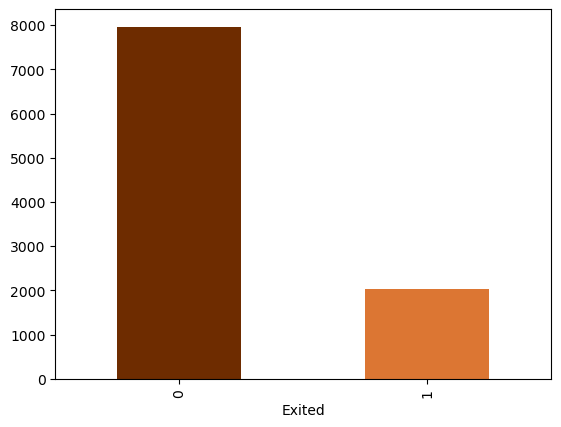

In [160]:
data['Exited'].value_counts().plot(kind='bar',color=['#6E2C00','#DC7633'])

## Separating the categorical Variables and Numerical variables into two different datasets for Data Preparations for Data Analysis.

In [161]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [162]:
categorical = [var for var in data.columns if data[var].dtype == 'O']
categorical

['Surname', 'Geography', 'Gender']

In [163]:
cat_data = data[categorical]

In [164]:
cat_data['RowNumber'] = data['RowNumber']

C:\Users\Dell\AppData\Local\Temp\ipykernel_18172\741325881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['RowNumber'] = data['RowNumber']


In [165]:
cat_data.head()

,Surname,Geography,Gender,RowNumber
0,Hargrave,France,Female,1
1,Hill,Spain,Female,2
2,Onio,France,Female,3
3,Boni,France,Female,4
4,Mitchell,Spain,Female,5


In [166]:
cat_data.shape

(10000, 4)

In [167]:
numerical = [var for var in data.columns if data[var].dtype != 'O']

In [168]:
num_data = data[numerical]
num_data.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [169]:
num_data.shape

(10000, 11)

## Outlier Detection and Treatment 

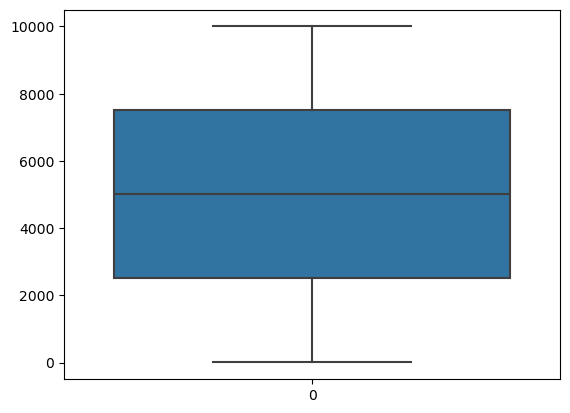

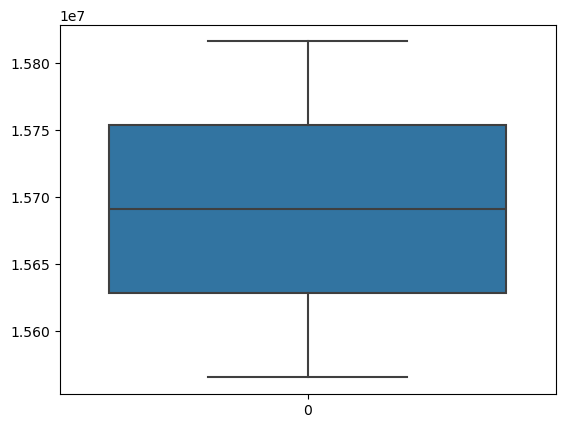

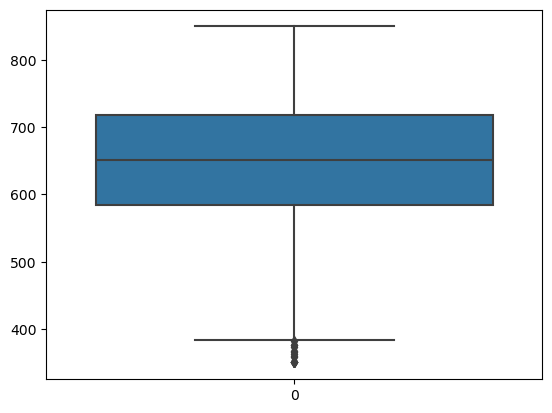

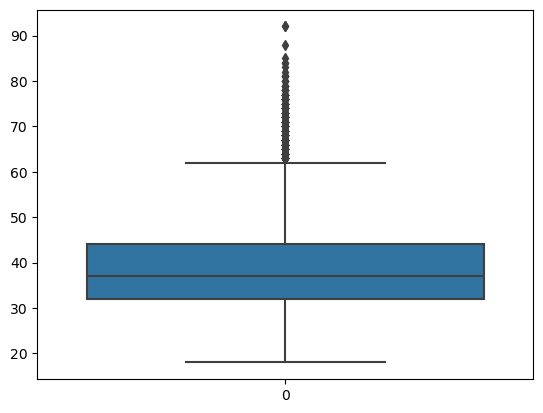

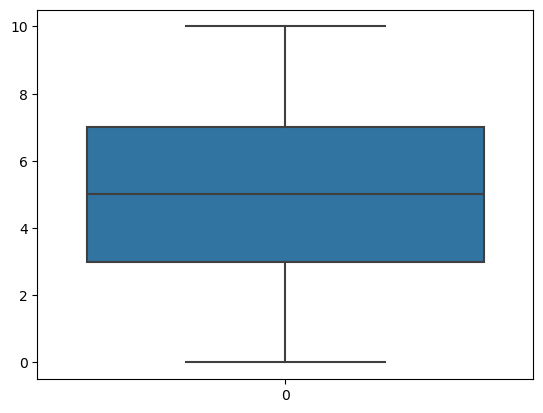

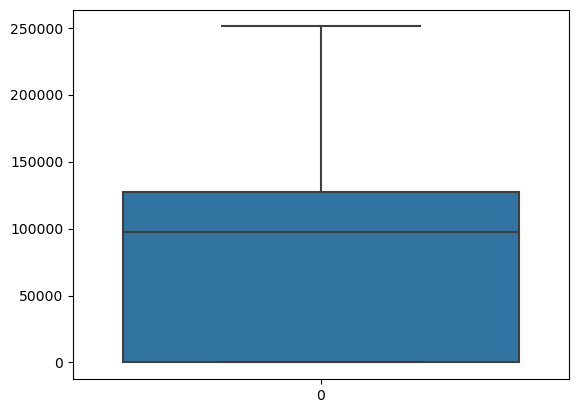

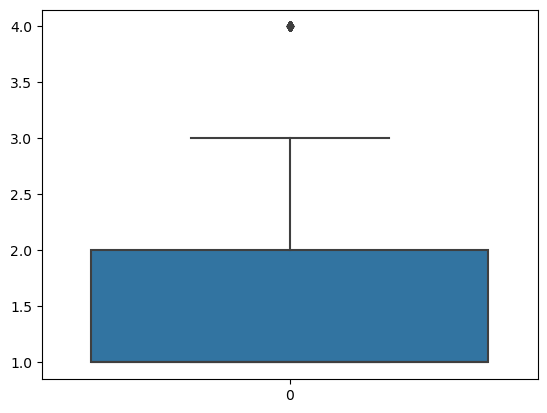

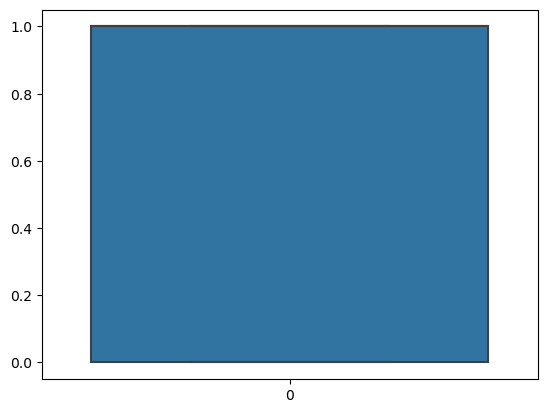

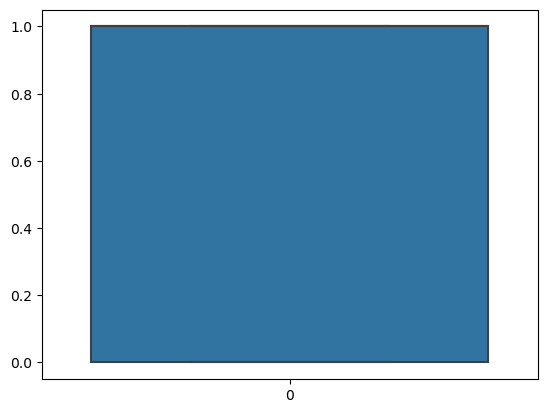

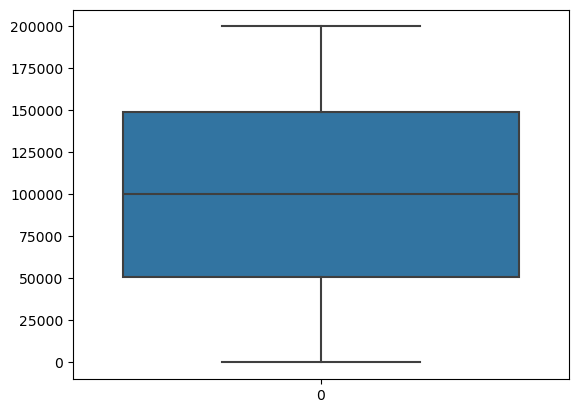

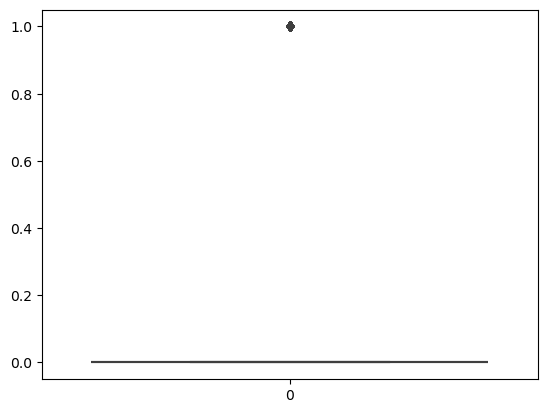

In [170]:
for col in num_data:
    sns.boxplot(num_data[col])
    plt.show()

In [171]:
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

In [172]:
num_data.apply(outliertreat_IQR)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-4998.5,15441470.0,383.0,14.0,-3.0,-191466.36,-0.5,-1.5,-1.5,-96577.09625,0.0
1,14999.5,15940292.0,919.0,62.0,13.0,319110.60,3.5,2.5,2.5,296967.45375,0.0


In [173]:
num_data['CreditScore'] = num_data['CreditScore'].clip(lower = 383.0, upper = 919.0)
num_data['Age'] = num_data['Age'].clip(lower = 14.0, upper = 62.0)
num_data['NumOfProducts'] = num_data['NumOfProducts'].clip(lower = -0.5, upper = 3.5)

C:\Users\Dell\AppData\Local\Temp\ipykernel_18172\3855830148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['CreditScore'] = num_data['CreditScore'].clip(lower = 383.0, upper = 919.0)
C:\Users\Dell\AppData\Local\Temp\ipykernel_18172\3855830148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['Age'] = num_data['Age'].clip(lower = 14.0, upper = 62.0)
C:\Users\Dell\AppData\Local\Temp\ipykernel_18172\3855830148.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

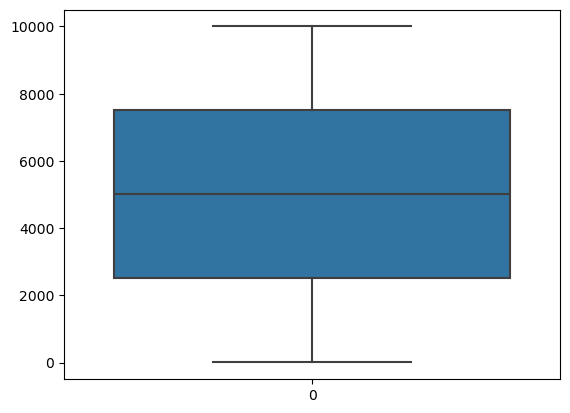

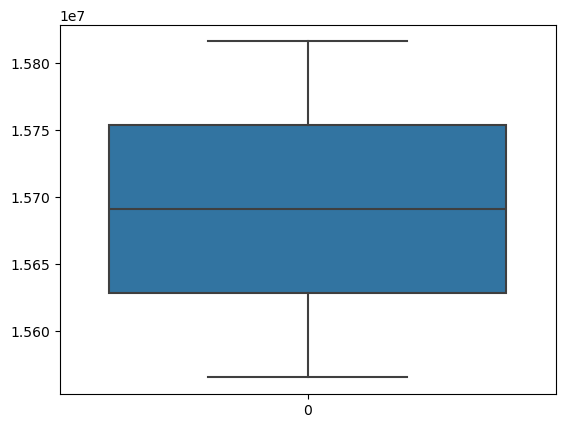

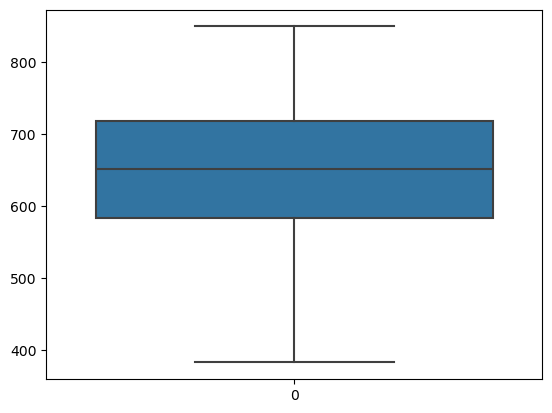

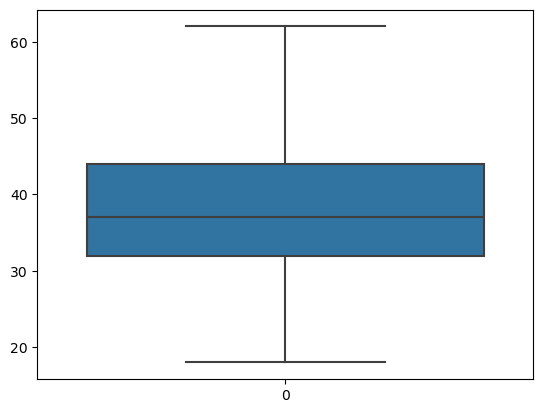

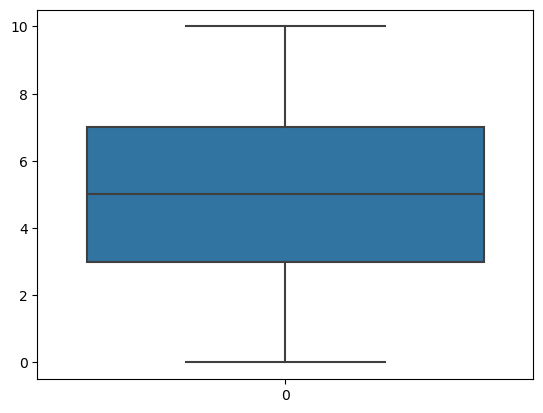

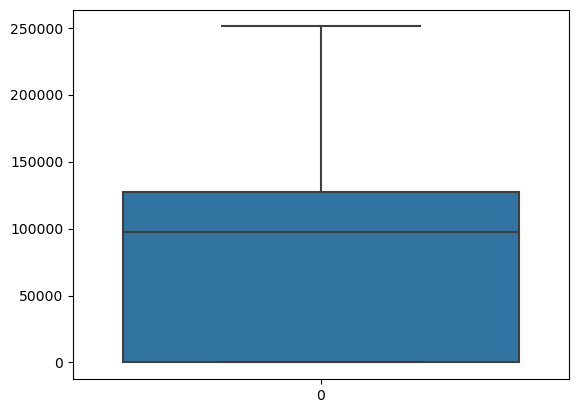

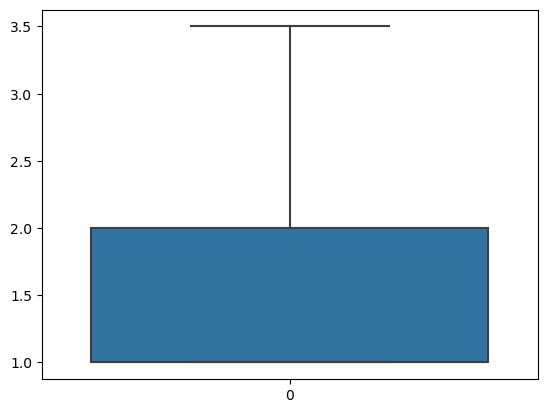

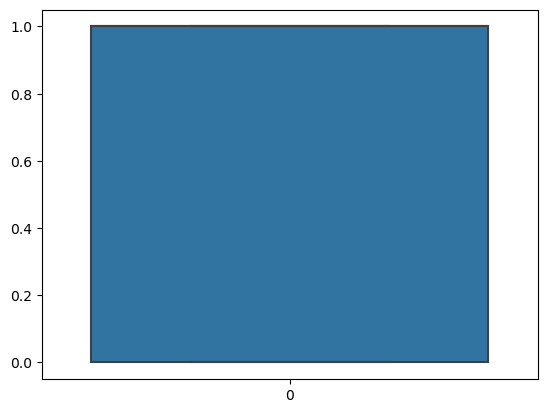

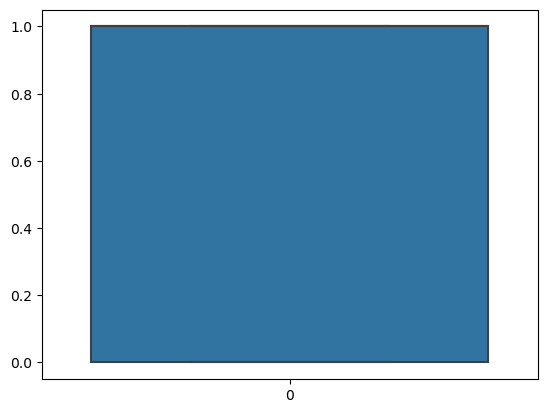

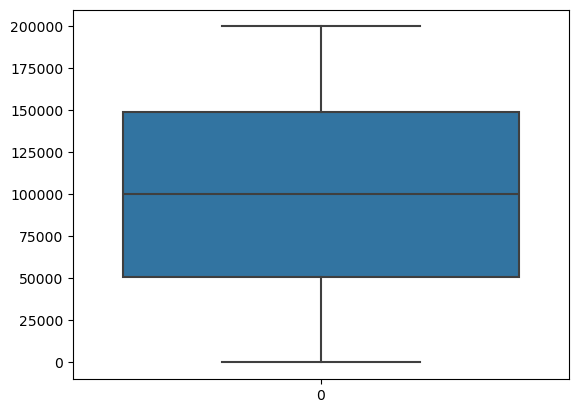

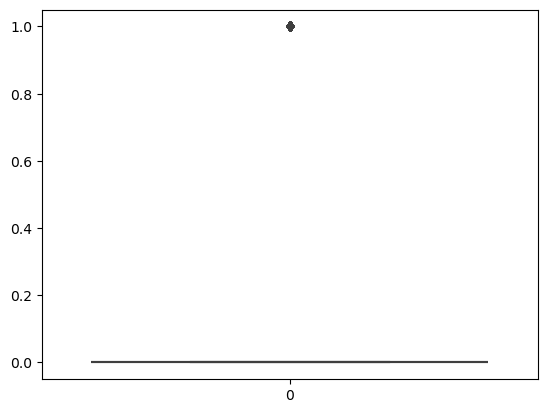

In [174]:
for col in num_data:
    sns.boxplot(num_data[col])
    plt.show()

## Merging the numerical data and the categorical data

In [175]:
Final_Data = pd.merge(num_data,cat_data,how = 'inner', left_on = 'RowNumber', right_on = 'RowNumber')

In [176]:
Final_Data.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname,Geography,Gender
0,1,15634602,619,42,2,0.00,1.0,1,1,101348.88,1,Hargrave,France,Female
1,2,15647311,608,41,1,83807.86,1.0,0,1,112542.58,0,Hill,Spain,Female
2,3,15619304,502,42,8,159660.80,3.0,1,0,113931.57,1,Onio,France,Female
3,4,15701354,699,39,1,0.00,2.0,0,0,93826.63,0,Boni,France,Female
4,5,15737888,850,43,2,125510.82,1.0,1,1,79084.10,0,Mitchell,Spain,Female


**copy of dataset**

In [177]:
final_data1 = Final_Data.copy()

In [178]:
final_data1.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname,Geography,Gender
0,1,15634602,619,42,2,0.00,1.0,1,1,101348.88,1,Hargrave,France,Female
1,2,15647311,608,41,1,83807.86,1.0,0,1,112542.58,0,Hill,Spain,Female
2,3,15619304,502,42,8,159660.80,3.0,1,0,113931.57,1,Onio,France,Female
3,4,15701354,699,39,1,0.00,2.0,0,0,93826.63,0,Boni,France,Female
4,5,15737888,850,43,2,125510.82,1.0,1,1,79084.10,0,Mitchell,Spain,Female


In [179]:
final_data1= final_data1.drop(columns = 'Surname')

In [180]:
final_data1.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography,Gender
0,1,15634602,619,42,2,0.00,1.0,1,1,101348.88,1,France,Female
1,2,15647311,608,41,1,83807.86,1.0,0,1,112542.58,0,Spain,Female
2,3,15619304,502,42,8,159660.80,3.0,1,0,113931.57,1,France,Female
3,4,15701354,699,39,1,0.00,2.0,0,0,93826.63,0,France,Female
4,5,15737888,850,43,2,125510.82,1.0,1,1,79084.10,0,Spain,Female


## ONE-HOT ENCODING

In [181]:
cat_data.nunique()

Surname       2932
Geography        3
Gender           2
RowNumber    10000
dtype: int64

In [182]:
cat_data.columns

Index(['Surname', 'Geography', 'Gender', 'RowNumber'], dtype='object')

In [183]:
final_data1 = pd.get_dummies(final_data1,columns = ['Geography', 'Gender'],dtype = int)

In [184]:
final_data1.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.00,1.0,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,608,41,1,83807.86,1.0,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,502,42,8,159660.80,3.0,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,699,39,1,0.00,2.0,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,850,43,2,125510.82,1.0,1,1,79084.10,0,0,0,1,1,0


## Feature Engineering

In [185]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [186]:
corr = final_data1.corrwith(final_data1.IsActiveMember).abs().sort_values(ascending = False)

In [187]:
corr

IsActiveMember       1.000000
Exited               0.156128
Age                  0.072455
Tenure               0.028362
CreditScore          0.025537
Gender_Male          0.022544
Gender_Female        0.022544
Geography_Germany    0.020486
Geography_Spain      0.016732
RowNumber            0.012044
HasCrCard            0.011866
EstimatedSalary      0.011421
NumOfProducts        0.010142
Balance              0.010084
Geography_France     0.003317
CustomerId           0.001665
dtype: float64

In [188]:
p = corr[np.abs(corr)>0.01].index.difference(['IsActiveMember'])
p

Index(['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'Exited',
       'Gender_Female', 'Gender_Male', 'Geography_Germany', 'Geography_Spain',
       'HasCrCard', 'NumOfProducts', 'RowNumber', 'Tenure'],
      dtype='object')

In [189]:
final_data1 = final_data1.loc[ : : ,['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'Exited','Gender_Female', 'Gender_Male', 'Geography_Germany', 'Geography_Spain','HasCrCard', 'NumOfProducts', 'RowNumber', 'Tenure']]

In [190]:
final_data1.head()

,Age,Balance,CreditScore,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_Germany,Geography_Spain,HasCrCard,NumOfProducts,RowNumber,Tenure
0,42,0.00,619,101348.88,1,1,0,0,0,1,1.0,1,2
1,41,83807.86,608,112542.58,0,1,0,0,1,0,1.0,2,1
2,42,159660.80,502,113931.57,1,1,0,0,0,1,3.0,3,8
3,39,0.00,699,93826.63,0,1,0,0,0,0,2.0,4,1
4,43,125510.82,850,79084.10,0,1,0,0,1,1,1.0,5,2


**Converting the Float data type into Integer data type.**

In [191]:
final_data1['Balance']=final_data1['Balance'].astype(int)

In [192]:
final_data1['NumOfProducts']=final_data1['NumOfProducts'].astype(int)

In [193]:
final_data1['EstimatedSalary']=final_data1['EstimatedSalary'].astype(int)

In [194]:
final_data1.head()

,Age,Balance,CreditScore,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_Germany,Geography_Spain,HasCrCard,NumOfProducts,RowNumber,Tenure
0,42,0,619,101348,1,1,0,0,0,1,1,1,2
1,41,83807,608,112542,0,1,0,0,1,0,1,2,1
2,42,159660,502,113931,1,1,0,0,0,1,3,3,8
3,39,0,699,93826,0,1,0,0,0,0,2,4,1
4,43,125510,850,79084,0,1,0,0,1,1,1,5,2


## Splitting the final dataset into Training and Testing dataset

In [195]:
x = final_data1.iloc[:,0:9]
y = final_data1.iloc[:,9]

In [196]:
print(x.shape)
print(y.shape)

(10000, 9)
(10000,)


In [197]:
print(x.columns)

Index(['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'Exited',
       'Gender_Female', 'Gender_Male', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')


In [198]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7500, 9)
(7500,)
(2500, 9)
(2500,)


## Modelling

### Logistic Regression

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [200]:
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, accuracy_score

In [201]:
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(x_train, y_train)
y_pred_lr = Logistic_Regression.predict(x_test)

lr_AUROC = roc_auc_score(y_test, y_pred_lr)*100
lr_Acu = accuracy_score(y_test, y_pred_lr)*100
lr_f1 = f1_score(y_test, y_pred_lr)



print( "AUROC OF Sampled Logistic Regression : ", roc_auc_score(y_test, Logistic_Regression.predict_proba(x_test)[:,1])*100)
print("F1 SCORE OF Logistic Regression : ", lr_f1 )
print("Accuracy OF Logistic Regression : ", lr_Acu)
print("AUROC OF Logistic Regression : ", lr_AUROC)

AUROC OF Sampled Logistic Regression :  47.68797462945328
F1 SCORE OF Logistic Regression :  0.824082784571966
Accuracy OF Logistic Regression :  70.08
AUROC OF Logistic Regression :  50.0


### Decision Tree

In [202]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text

In [203]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, minmax_scale

In [204]:
model = DecisionTreeClassifier() 

In [205]:
model = DecisionTreeClassifier() 
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuaracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Testing Accuaracy : 0.5828
[[ 237  511]
 [ 532 1220]]


    ### K-Nearest Neighbors Classifier

In [206]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, minmax_scale

In [207]:
sc = StandardScaler()
sc = sc.fit(x_train)

In [208]:
x_train_std = pd.DataFrame(sc.transform(x_train), columns =x_train.columns )

In [209]:
x_test_std = pd.DataFrame(sc.transform(x_test), columns =x_test.columns )

In [210]:
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

In [211]:
#we don't know parameter values of K and Weights

param_grid = {'n_neighbors':[3,4,5,6,7,8,9,10], 'weights':['uniform', 'distance']}  # Number of combinations = 16

knn_model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=True).fit(x_train_std, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [212]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [213]:
knn_model.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [214]:
knn_model.best_score_

0.5103835860596135

In [215]:
knn_model_final = KNeighborsClassifier(n_neighbors=10, weights='uniform', n_jobs=-1).fit(x_train_std, y_train)

In [216]:
train_pred_prob = pd.DataFrame(knn_model_final.predict_proba(x_train_std))[1]
test_pred_prob = pd.DataFrame(knn_model_final.predict_proba(x_test_std))[1]

In [217]:
import sklearn.metrics as metrics
print('ROC_AUC_Train:', metrics.roc_auc_score(y_train, train_pred_prob))

ROC_AUC_Train: 0.7013813601270517


In [218]:
print('ROC_AUC_Test:', metrics.roc_auc_score(y_test, test_pred_prob))

ROC_AUC_Test: 0.47013611640172887


In [219]:
train_pred = knn_model_final.predict(x_train_std)
test_pred =knn_model_final.predict(x_test_std)

In [220]:
print(metrics.classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.55      0.27      0.36      2197
           1       0.75      0.91      0.82      5303

    accuracy                           0.72      7500
   macro avg       0.65      0.59      0.59      7500
weighted avg       0.69      0.72      0.69      7500



### Random Forest Classifier

In [221]:
from sklearn.ensemble import RandomForestClassifier

In [222]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Testing Accuracy : 0.6748
[[  35  713]
 [ 100 1652]]


### Naive Bayes

In [223]:
from sklearn.naive_bayes import GaussianNB  
gnb = GaussianNB()

# fit the model
gnb.fit(x_train,y_train)

GaussianNB()

In [224]:
y_train_pred = gnb.predict(x_train)

In [225]:
y_train_pred = pd.Series(y_train_pred)

In [226]:
Model_data_train = pd.DataFrame(y_train)

In [227]:
Model_data_train['y_pred'] = y_train_pred

In [228]:
Model_data_train

,HasCrCard,y_pred
2967,0,1.0
700,1,1.0
3481,1,1.0
1621,1,1.0
800,1,1.0
8942,1,NaN
3980,1,1.0
3663,1,1.0
7878,1,NaN
2330,1,1.0


In [229]:
pd.crosstab(Model_data_train.HasCrCard,Model_data_train.y_pred, margins = True)

y_pred,1.0,All
HasCrCard,,
0,1662,1662
1,3953,3953
All,5615,5615


In [230]:
from sklearn.metrics import confusion_matrix

data_table = confusion_matrix(y_train, y_train_pred)

print('Confusion matrix\n\n', data_table)

print('\nTrue Positives(TP) = ', data_table[0,0])

print('\nTrue Negatives(TN) = ', data_table[1,1])

print('\nFalse Positives(FP) = ', data_table[0,1])

print('\nFalse Negatives(FN) = ', data_table[1,0])


data_table.shape

Confusion matrix

 [[   0 2197]
 [   0 5303]]

True Positives(TP) =  0

True Negatives(TN) =  5303

False Positives(FP) =  2197

False Negatives(FN) =  0


(2, 2)

<Axes: >

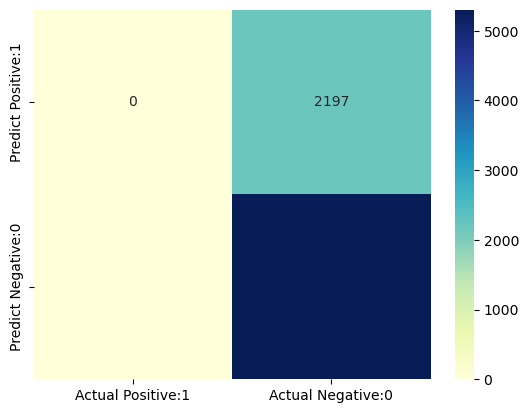

In [231]:
matrix = pd.DataFrame(data=data_table, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')

In [232]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2197
           1       0.71      1.00      0.83      5303

    accuracy                           0.71      7500
   macro avg       0.35      0.50      0.41      7500
weighted avg       0.50      0.71      0.59      7500



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [233]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

Model accuracy score: 0.7071
